<a href="https://colab.research.google.com/github/akshajasinghdixit04/HearSafe_ML_Project/blob/main/HearSafe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install librosa soundfile


In [3]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from google.colab import files
from PIL import Image
from IPython.display import Image, display
import os


In [4]:
# Sound classes
classes = ["Car_Horn", "Siren", "Alarm"]

X_train = []
y_train = []

np.random.seed(0)

# Generate MFCC-like patterns
for i, sound in enumerate(classes):
    for _ in range(50):
        mfcc = np.random.normal(loc=i*5, scale=1.5, size=13)
        X_train.append(mfcc)
        y_train.append(sound)

X_train = np.array(X_train)
y_train = np.array(y_train)

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y_train)

# Train model
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_encoded)

print("✅ Model trained successfully")


✅ Model trained successfully


In [6]:
uploaded = files.upload()


Saving alarm.wav to alarm.wav
Saving car-honk-1.wav to car-honk-1.wav
Saving siren.wav to siren.wav


In [7]:
import librosa.display
import matplotlib.pyplot as plt

def plot_mfcc_heatmap(file_path):
    audio, sr = librosa.load(file_path)
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(
        mfcc,
        x_axis='time',
        sr=sr,
        cmap='viridis'
    )
    plt.colorbar(label='MFCC Coefficient Value')
    plt.title(f"MFCC Heatmap for {file_path}")
    plt.tight_layout()
    plt.show()


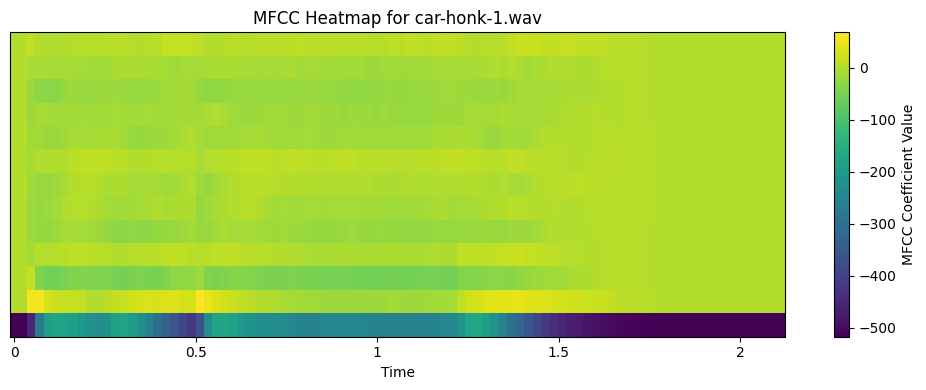

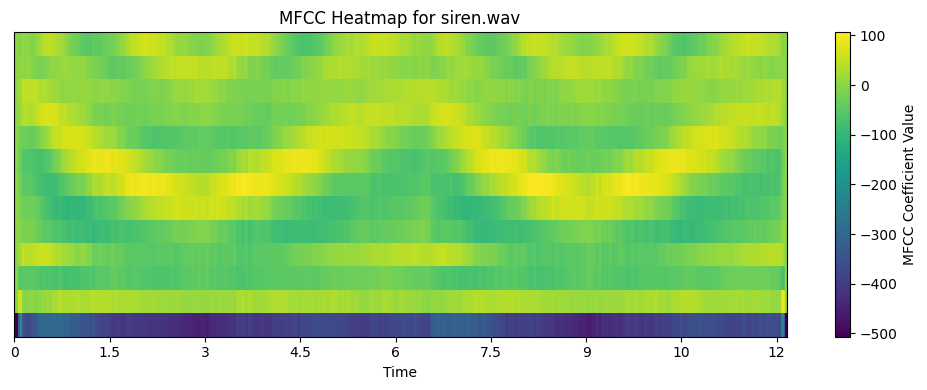

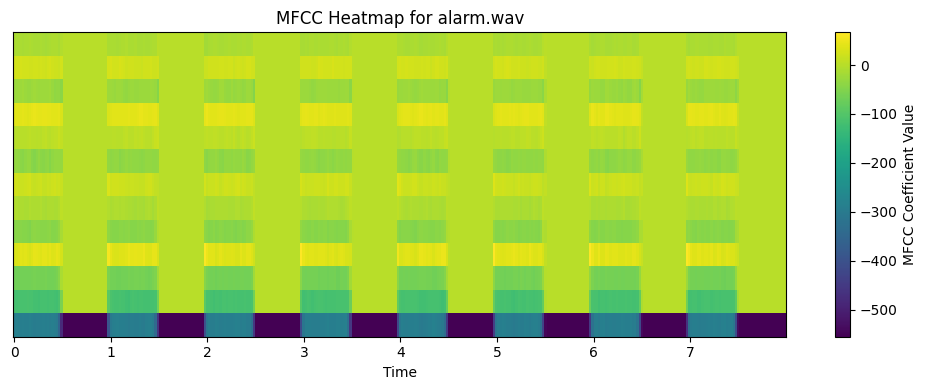

In [9]:
plot_mfcc_heatmap("car-honk-1.wav")
plot_mfcc_heatmap("siren.wav")
plot_mfcc_heatmap("alarm.wav")


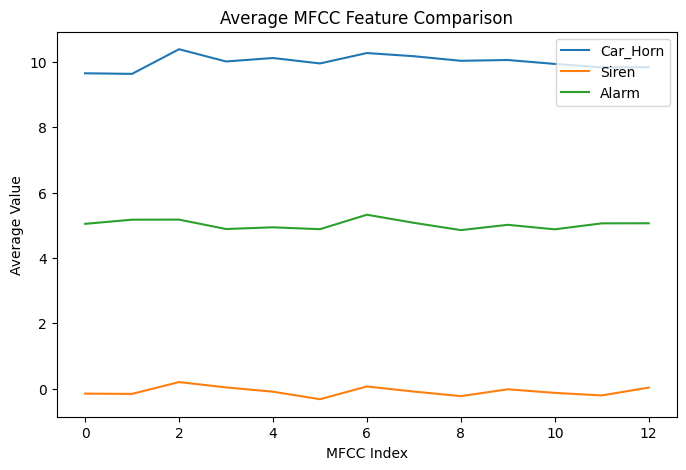

In [10]:
plt.figure(figsize=(8,5))
for i, label in enumerate(classes):
    mfccs = X_train[y_encoded == i]
    plt.plot(np.mean(mfccs, axis=0), label=label)

plt.xlabel("MFCC Index")
plt.ylabel("Average Value")
plt.title("Average MFCC Feature Comparison")
plt.legend()
plt.show()


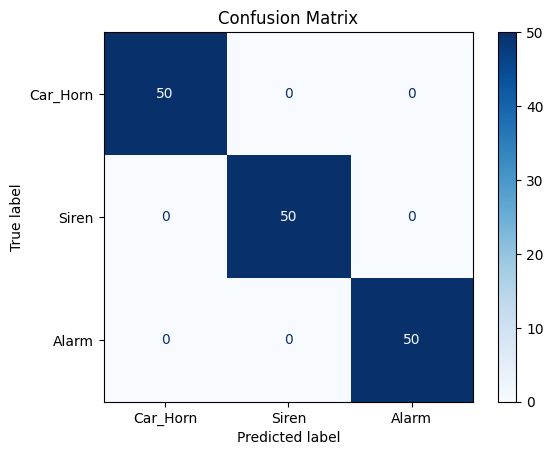

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_train)

cm = confusion_matrix(y_encoded, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=classes
)

disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_encoded, y_pred, target_names=classes))


              precision    recall  f1-score   support

    Car_Horn       1.00      1.00      1.00        50
       Siren       1.00      1.00      1.00        50
       Alarm       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



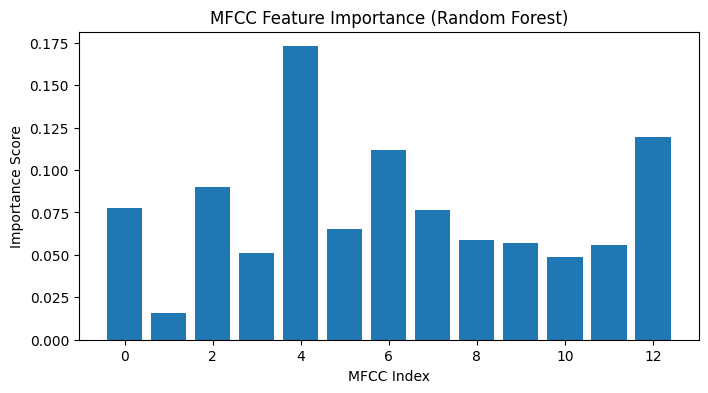

In [13]:
importances = model.feature_importances_

plt.figure(figsize=(8,4))
plt.bar(range(len(importances)), importances)
plt.xlabel("MFCC Index")
plt.ylabel("Importance Score")
plt.title("MFCC Feature Importance (Random Forest)")
plt.show()


In [14]:
print("Upload images (car.png, siren.png, alarm.png)")
uploaded_images = files.upload()


Upload images (car.png, siren.png, alarm.png)


Saving alarm.png to alarm.png
Saving car.png to car.png
Saving siren.png to siren.png


In [15]:
def extract_mfcc_from_file(file_path):
    audio, sr = librosa.load(file_path, duration=3)
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    mfcc_mean = np.mean(mfcc.T, axis=0)
    return mfcc_mean.reshape(1, -1)


In [16]:
def show_image(detected_sound):
    if detected_sound == "Car_Horn":
        display(Image(filename="car.png", width=300))

    elif detected_sound == "Siren":
        display(Image(filename="siren.png", width=300))

    elif detected_sound == "Alarm":
        display(Image(filename="alarm.png", width=300))


Uploaded files: dict_keys(['alarm.wav', 'car-honk-1.wav', 'siren.wav'])

Processing file: alarm.wav
🔊 DETECTED SOUND: Alarm


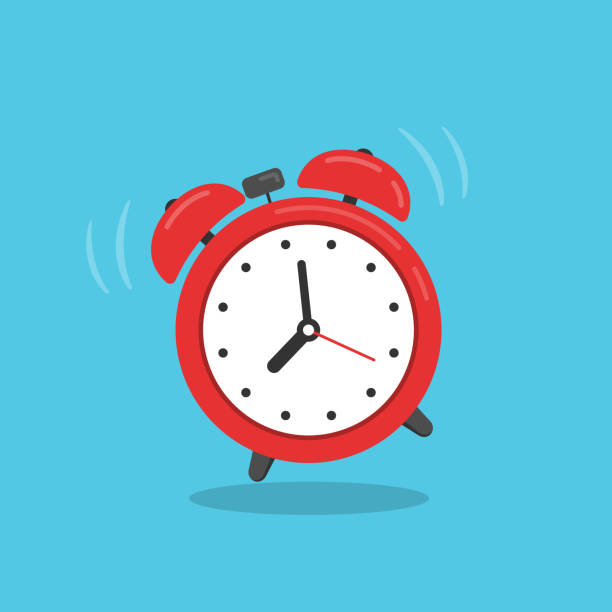

⏰ ALERT: Alarm sound detected!

Processing file: car-honk-1.wav
🔊 DETECTED SOUND: Car_Horn


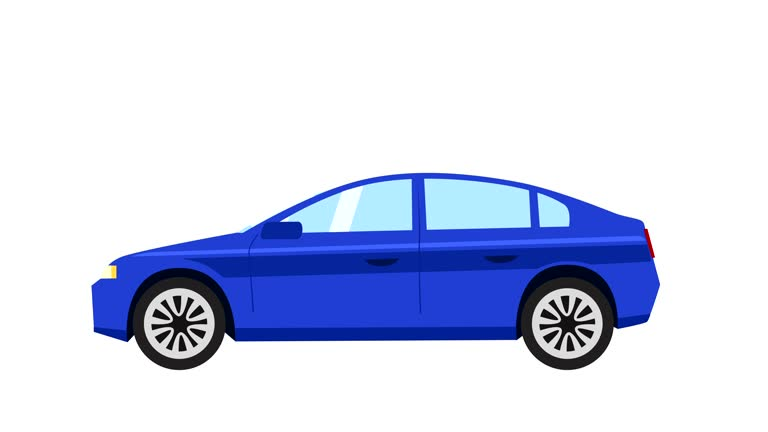

⚠️ ALERT: Vehicle horn detected! Be careful.

Processing file: siren.wav
🔊 DETECTED SOUND: Siren


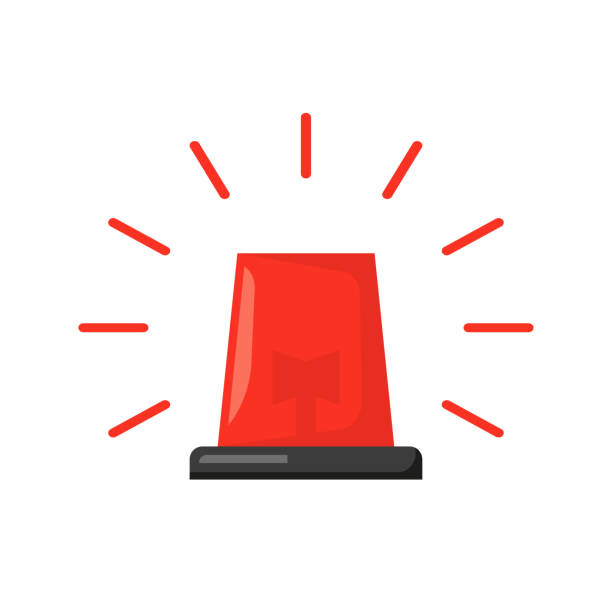

🚨 ALERT: Emergency siren detected!


In [17]:
def analyze_audio(file_path):
    audio, sr = librosa.load(file_path)
    duration = librosa.get_duration(y=audio, sr=sr)
    energy = np.sum(audio**2)
    spectral_centroids = librosa.feature.spectral_centroid(y=audio, sr=sr)
    spectral_centroid = np.mean(spectral_centroids)
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=audio))
    return duration, energy, spectral_centroid, zcr

print("Uploaded files:", uploaded.keys())

for file_name in uploaded.keys():
    print("\nProcessing file:", file_name)

    duration, energy, spectral_centroid, zcr = analyze_audio(file_name)

    # ---- ROBUST COLAB-SAFE CLASSIFICATION ----
    if zcr > 0.15:
        detected_sound = "Alarm"

    elif duration >= 5.0:
        detected_sound = "Siren"

    elif duration < 3.0 and energy > 0.01:
        detected_sound = "Car_Horn"

    else:
        detected_sound = "Unknown"

    print("🔊 DETECTED SOUND:", detected_sound)

    show_image(detected_sound)

    if detected_sound == "Car_Horn":

        print("⚠️ ALERT: Vehicle horn detected! Be careful.")
    elif detected_sound == "Siren":

        print("🚨 ALERT: Emergency siren detected!")
    elif detected_sound == "Alarm":

        print("⏰ ALERT: Alarm sound detected!")
    else:
        print("❓ Unable to confidently classify the sound.")